In [39]:
# Import all the required libraries
# here we will be using XG Boost classifier as our base training model for the resampled dataset
# F - measure is used to analyse different models
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
# Data is read from the csv file inputted
dataset = pd.read_csv('credit-card.csv')
# By default the .head keyword outputs 5 rows
dataset.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [41]:
# From the given set we have to know how many of the samples are of no fraud and fraud
# 1 means fraud has occured and 0 means no fraud
# dataset is heavily class imbalanced
counter = dataset['Class'].value_counts()

print('Fraud occured "1" :', counter[1])
print('No Fraud occured "0":', counter[0])
# percentage of fraud to that of No frauds
print((counter[1]/counter[0])* 100)

Fraud occured "1" : 492
No Fraud occured "0": 9000
5.466666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


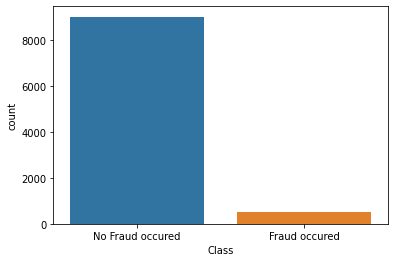

In [42]:
# Visual plot to know the number of samples present in both the classes
graph = sns.countplot(dataset['Class'])
graph.set_xticklabels(['No Fraud occured', 'Fraud occured'])
plt.show()

In [43]:
# Input values - All rows and last but one colums
x = dataset.iloc[:, :-1]
# Output values - All rows and last column 
y = dataset.iloc[:, -1]

# check length of 1's and 0's
one = np.where(y==1)
zero = np.where(y==0)
len(one[0]), len(zero[0])
# splitting of the dataset for training the model and for testing the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# XGB classifier being trained
xgb_classifier_model = XGBClassifier().fit(x_train, y_train)
# XGB classfier tested (supervised learning)
xgb_y_predicted_value = xgb_classifier_model.predict(x_test)
# performance metric calculation and display
xgb_accuracy_score = accuracy_score(xgb_y_predicted_value, y_test)

print('Accuracy score of the model:', xgb_accuracy_score)
print('F1 score of the model is:',f1_score(xgb_y_predicted_value, y_test))
confusion_matrix(xgb_y_predicted_value, y_test)

Accuracy score of the model: 0.990521327014218
F1 score of the model is: 0.9021739130434783


array([[1798,   16],
       [   2,   83]])

In [44]:
# Undersampling - Random undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 0)

x_rus, y_rus = rus.fit_resample(x, y)

print('Original dataset:', Counter(y))
print('Resample dataset:', Counter(y_rus))
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_rus, y_rus, test_size =0.20, random_state=42)

training_model = XGBClassifier()
training_model.fit(x_train1, y_train1)
predicted_y_value = training_model.predict(x_test1)

print('F1 score:',f1_score(y_test1, predicted_y_value))

Original dataset: Counter({0: 9000, 1: 492})
Resample dataset: Counter({0: 492, 1: 492})
F1 score: 0.9518716577540107


In [45]:
# Undersampling - Near miss undersampling - 1
from imblearn.under_sampling import NearMiss

nm_1 = NearMiss(version = 1)

x_nm_1, y_nm_1 = nm_1.fit_resample(x, y)

print('Original dataset:', Counter(y))
print('Resample dataset:', Counter(y_nm_1))
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_nm_1, y_nm_1, test_size =0.20, random_state=42)

model = XGBClassifier()
model.fit(x_train1, y_train1)
predicted_y_value = model.predict(x_test1)

print('F1 score:',f1_score(y_test1, predicted_y_value))

Original dataset: Counter({0: 9000, 1: 492})
Resample dataset: Counter({0: 492, 1: 492})
F1 score: 0.9411764705882354


In [46]:
# Undersampling - Near miss 2
from imblearn.under_sampling import NearMiss

nm_2 = NearMiss(version = 2)

x_nm_2, y_nm_2 = nm_2.fit_resample(x, y)

print('Original dataset:', Counter(y))
print('Resample dataset:', Counter(y_nm_2))
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_nm_2, y_nm_2, test_size =0.20, random_state=42)

model = XGBClassifier()
model.fit(x_train1, y_train1)
predicted_y_value = model.predict(x_test1)

print('F1 score:',f1_score(y_test1, predicted_y_value))

Original dataset: Counter({0: 9000, 1: 492})
Resample dataset: Counter({0: 492, 1: 492})
F1 score: 0.9797979797979798


In [47]:
# Undersampling - Near miss 3
from imblearn.under_sampling import NearMiss

nm_3 = NearMiss(version = 3)

x_nm_3, y_nm_3 = nm_3.fit_resample(x, y)

print('Original dataset:', Counter(y))
print('Resample dataset:', Counter(y_nm_3))
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_nm_3, y_nm_3, test_size =0.20, random_state=42)

model = XGBClassifier()
model.fit(x_train1, y_train1)
predicted_y_value = model.predict(x_test1)

print('F1 score:',f1_score(y_test1, predicted_y_value))

Original dataset: Counter({0: 9000, 1: 492})
Resample dataset: Counter({0: 492, 1: 492})
F1 score: 0.935483870967742


In [48]:
# undersampling - Tomek Links
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy = 'majority')

x_tl, y_tl = tl.fit_resample(x, y)

print('Original dataset:', Counter(y))
print('Resample dataset:', Counter(y_tl))
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_tl, y_tl, test_size =0.20, random_state=42)

model = XGBClassifier()
model.fit(x_train1, y_train1)
predicted_y_value = model.predict(x_test1)

print('F1 score:',f1_score(y_test1, predicted_y_value))

Original dataset: Counter({0: 9000, 1: 492})
Resample dataset: Counter({0: 8829, 1: 492})
F1 score: 0.9035532994923857


In [49]:
# undersampling - Edited nearest neighbour
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours()

x_enn, y_enn = enn.fit_resample(x, y)

print('Original dataset:', Counter(y))
print('Resample dataset:', Counter(y_enn))
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_enn, y_enn, test_size =0.20, random_state=42)

model = XGBClassifier()
model.fit(x_train1, y_train1)
predicted_y_value = model.predict(x_test1)

print('F1 score:',f1_score(y_test1, predicted_y_value))

Original dataset: Counter({0: 9000, 1: 492})
Resample dataset: Counter({0: 8125, 1: 492})
F1 score: 0.9028571428571428


In [50]:
# undersampling - One sided selection
from imblearn.under_sampling import OneSidedSelection
oss = OneSidedSelection()

x_oss, y_oss = oss.fit_resample(x, y)

print('Original dataset:', Counter(y))
print('Resample dataset:', Counter(y_oss))
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_oss, y_oss, test_size =0.20, random_state=42)

model = XGBClassifier()
model.fit(x_train1, y_train1)
predicted_y_value = model.predict(x_test1)

print('F1 score:',f1_score(y_test1, predicted_y_value))

Original dataset: Counter({0: 9000, 1: 492})
Resample dataset: Counter({0: 8802, 1: 492})
F1 score: 0.900523560209424


In [51]:
# Undersampling - Neighbourhood cleaning rule
from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule()

x_ncr, y_ncr = ncr.fit_resample(x, y)

print('Original dataset:', Counter(y))
print('Resample dataset:', Counter(y_ncr))
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_ncr, y_ncr, test_size =0.20, random_state=42)

model = XGBClassifier()
model.fit(x_train1, y_train1)
predicted_y_value = model.predict(x_test1)

print('F1 score:',f1_score(y_test1, predicted_y_value))

Original dataset: Counter({0: 9000, 1: 492})
Resample dataset: Counter({0: 8014, 1: 492})
F1 score: 0.911764705882353


In [52]:
#Oversampling - SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset:', Counter(y))
print('Resample dataset:', Counter(y_smote))
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_smote, y_smote, test_size =0.20, random_state=42)

model = XGBClassifier()
model.fit(x_train1, y_train1)
predicted_y_value = model.predict(x_test1)

print('F1 score:',f1_score(y_test1, predicted_y_value))

Original dataset: Counter({0: 9000, 1: 492})
Resample dataset: Counter({1: 9000, 0: 9000})
F1 score: 0.9824858757062148


In [53]:
# Oversampling - ADASYN
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()

x_adasyn, y_adasyn = adasyn.fit_resample(x, y)

print('Original dataset:', Counter(y))
print('Resample dataset:', Counter(y_adasyn))
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_adasyn, y_adasyn, test_size =0.20, random_state=42)

model = XGBClassifier()
model.fit(x_train1, y_train1)
predicted_y_value = model.predict(x_test1)

print('F1 score:',f1_score(y_test1, predicted_y_value))

Original dataset: Counter({0: 9000, 1: 492})
Resample dataset: Counter({0: 9000, 1: 8979})
F1 score: 0.981939427618783


In [54]:
# Oversampling - Random oversampling
from imblearn.over_sampling import RandomOverSampler
rov = RandomOverSampler()

x_rov, y_rov = rov.fit_resample(x, y)

print('Original dataset:', Counter(y))
print('Resample dataset:', Counter(y_rov))
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_rov, y_rov, test_size =0.20, random_state=42)

model = XGBClassifier()
model.fit(x_train1, y_train1)
predicted_y_value = model.predict(x_test1)

print('F1 score:',f1_score(y_test1, predicted_y_value))

Original dataset: Counter({0: 9000, 1: 492})
Resample dataset: Counter({1: 9000, 0: 9000})
F1 score: 0.9919017034347948


In [55]:
# Oversampling - Borderline SMOTE
from imblearn.over_sampling import BorderlineSMOTE
bsmote = BorderlineSMOTE()

x_bsmote, y_bsmote = bsmote.fit_resample(x, y)

print('Original dataset:', Counter(y))
print('Resample dataset:', Counter(y_bsmote))
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_bsmote, y_bsmote, test_size =0.20, random_state=42)

model = XGBClassifier()
model.fit(x_train1, y_train1)
predicted_y_value = model.predict(x_test1)

print('F1 score:',f1_score(y_test1, predicted_y_value))

Original dataset: Counter({0: 9000, 1: 492})
Resample dataset: Counter({1: 9000, 0: 9000})
F1 score: 0.9881889763779528
